In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print("Features:", iris.feature_names)
print("Target names:", iris.target_names)


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)


SVC()

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



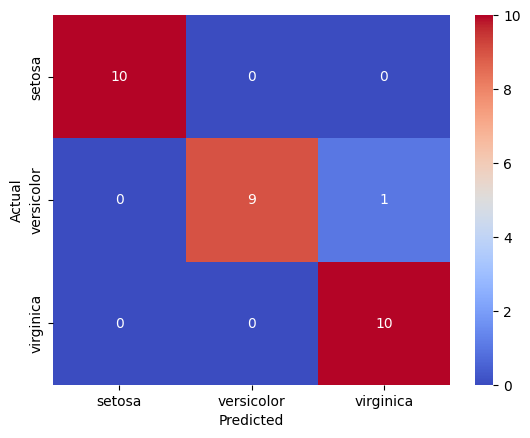

In [19]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


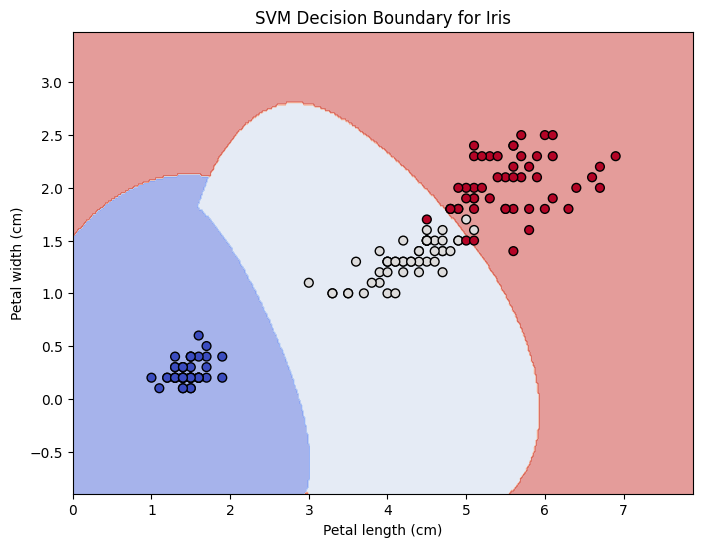

In [20]:
plt.figure(figsize=(8,6))
X_plot = X[:, [2, 3]]  # Petal length, Petal width
y_plot = y

# Train again for visualization
model_plot = SVC(kernel='rbf', C=1, gamma='auto')
model_plot.fit(X_plot, y_plot)

# Create meshgrid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, s=40, edgecolor='k', cmap='coolwarm')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('SVM Decision Boundary for Iris')
plt.show()


In [30]:
model = SVC(kernel='poly', C=1.0, gamma='scale')
model.fit(X_train, y_train)


SVC(kernel='poly')

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



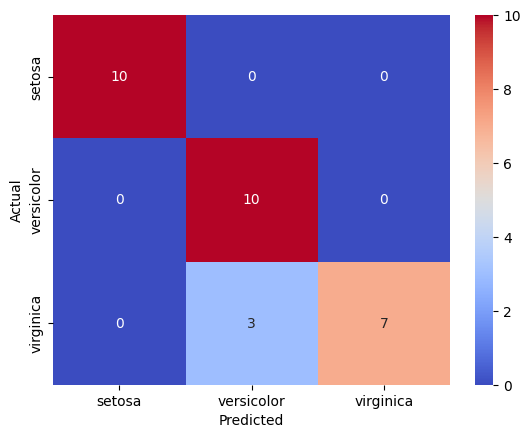

In [31]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

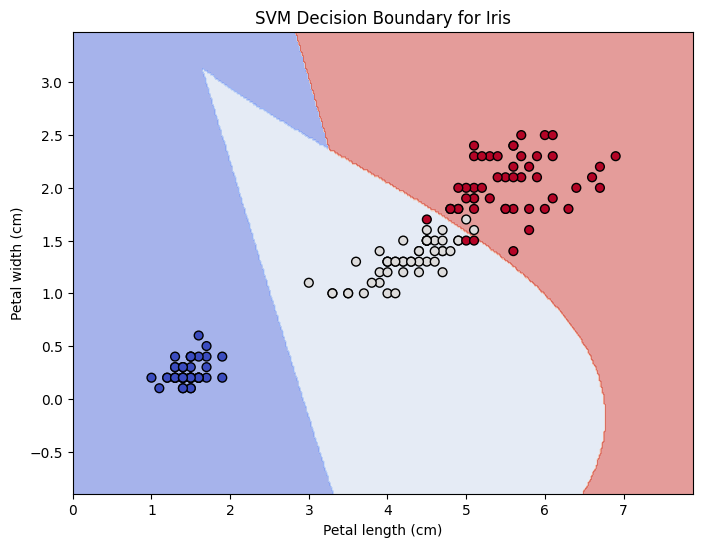

In [33]:
plt.figure(figsize=(8,6))
X_plot = X[:, [2, 3]]  # Petal length, Petal width
y_plot = y

# Train again for visualization
model_plot = SVC(kernel='poly', C=1, gamma='auto')
model_plot.fit(X_plot, y_plot)

# Create meshgrid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, s=40, edgecolor='k', cmap='coolwarm')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('SVM Decision Boundary for Iris')
plt.show()